In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape 

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

### Data Preprocessing

In [7]:
# Normalize images 
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train[0].shape

(32, 32, 3)

### Modelling

In [9]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))

# conv layers 
model.add(Conv2D(filters=6, kernel_size=5, strides=(1, 1), padding='same', activation='relu'))

# pooling 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# flatten 
model.add(Flatten())

# Fully Conncted NN 
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))

# output layer 
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                        

In [10]:
model.compile(loss="SparseCategoricalCrossentropy", optimizer="Adam", metrics=["accuracy"])

In [11]:
result = model.fit(X_train, y_train, verbose=1, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 121s 75ms/step - loss: 1.5347 - accuracy: 0.4491 - val_loss: 1.3198 - val_accuracy: 0.5251
Epoch 2/20
1563/1563 [==============================] - 111s 71ms/step - loss: 1.2301 - accuracy: 0.5611 - val_loss: 1.2734 - val_accuracy: 0.5490
Epoch 3/20
1563/1563 [==============================] - 112s 72ms/step - loss: 1.0687 - accuracy: 0.6193 - val_loss: 1.1581 - val_accuracy: 0.5913
Epoch 4/20
1563/1563 [==============================] - 113s 73ms/step - loss: 0.9221 - accuracy: 0.6739 - val_loss: 1.1517 - val_accuracy: 0.6031
Epoch 5/20
1563/1563 [==============================] - 111s 71ms/step - loss: 0.7856 - accuracy: 0.7243 - val_loss: 1.1576 - val_accuracy: 0.6164
Epoch 6/20
1563/1563 [==============================] - 110s 71ms/step - loss: 0.6565 - accuracy: 0.7691 - val_loss: 1.2094 - val_accuracy: 0.6127
Epoch 7/20
1563/1563 [==============================] - 102s 65ms/step - loss: 0.5276 - accuracy: 0.8148 - val_loss: 1

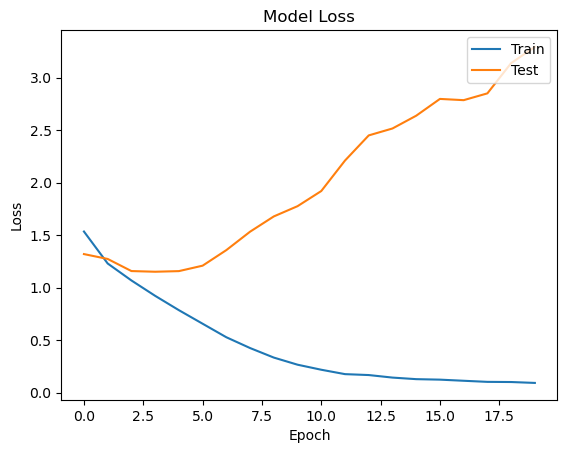

In [12]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

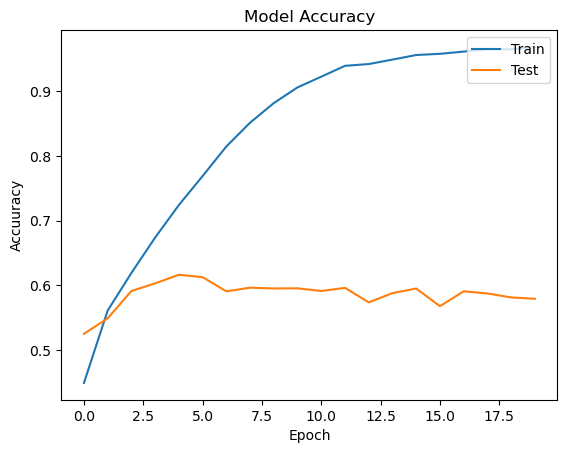

In [13]:
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

In [14]:
model.save("cifar10_classification_model_CNN.h5")

In [15]:
my_model = load_model("cifar10_classification_model_CNN.h5")
